## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 19085 files belonging to 10 classes.


### Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 4745 files belonging to 10 classes.


## Building Model

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

## Building Convolution Layer

In [11]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [21]:
model.add(Dropout(0.25))  # To Avoid Overfitting

In [23]:
model.add(Flatten())

In [25]:
model.add(Dense(units=1500,activation='relu'))

In [27]:
model.add(Dropout(0.4))

In [29]:
# Output Layer
model.add(Dense(units=10,activation='softmax'))

## Compiling Model

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Model Training

In [36]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
597/597 [==============================] - 2266s 4s/step - loss: 0.7095 - accuracy: 0.7567 - val_loss: 0.3546 - val_accuracy: 0.8786
Epoch 2/10
597/597 [==============================] - 2182s 4s/step - loss: 0.2213 - accuracy: 0.9253 - val_loss: 0.1336 - val_accuracy: 0.9524
Epoch 3/10
597/597 [==============================] - 2220s 4s/step - loss: 0.1471 - accuracy: 0.9509 - val_loss: 0.1258 - val_accuracy: 0.9572
Epoch 4/10
597/597 [==============================] - 2245s 4s/step - loss: 0.1139 - accuracy: 0.9623 - val_loss: 0.0810 - val_accuracy: 0.9726
Epoch 5/10
597/597 [==============================] - 2208s 4s/step - loss: 0.0819 - accuracy: 0.9720 - val_loss: 0.0593 - val_accuracy: 0.9817
Epoch 6/10
597/597 [==============================] - 2465s 4s/step - loss: 0.0668 - accuracy: 0.9780 - val_loss: 0.0688 - val_accuracy: 0.9768
Epoch 7/10
597/597 [==============================] - 2593s 4s/step - loss: 0.0570 - accuracy: 0.9809 - val_loss: 0.0592 - val_accuracy:

### Model Evaluation

In [38]:
# Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

597/597 [==============================] - 531s 889ms/step - loss: 0.0618 - accuracy: 0.9770


In [40]:
print(train_loss,train_acc)

0.061840180307626724 0.9769976139068604


In [42]:
# Model Evaluation on Validation set
val_loss,val_acc = model.evaluate(validation_set)

149/149 [==============================] - 137s 911ms/step - loss: 0.1069 - accuracy: 0.9631


In [43]:
print(val_loss,val_acc)

0.10689707845449448 0.9631190896034241


## Saving Model

In [46]:
model.save("trained_model.keras")

In [48]:
training_history.history

{'loss': [0.7095149755477905,
  0.22129078209400177,
  0.14709383249282837,
  0.11394292861223221,
  0.0819087028503418,
  0.06675635278224945,
  0.056994300335645676,
  0.04357955604791641,
  0.044645242393016815,
  0.04150671884417534],
 'accuracy': [0.7567199468612671,
  0.9252816438674927,
  0.9508514404296875,
  0.9623264074325562,
  0.9720199108123779,
  0.9780455827713013,
  0.9808750152587891,
  0.9859575629234314,
  0.9856431484222412,
  0.9858003854751587],
 'val_loss': [0.35463038086891174,
  0.13359595835208893,
  0.12575672566890717,
  0.08102687448263168,
  0.05931634455919266,
  0.06880785524845123,
  0.05915817990899086,
  0.08288422971963882,
  0.10747058689594269,
  0.10689711570739746],
 'val_accuracy': [0.8786090612411499,
  0.9523709416389465,
  0.9572181105613708,
  0.9726027250289917,
  0.9816648960113525,
  0.9768177270889282,
  0.9814541339874268,
  0.9751316905021667,
  0.9658588171005249,
  0.9631190896034241]}

In [50]:
training_history.history['accuracy']

[0.7567199468612671,
 0.9252816438674927,
 0.9508514404296875,
 0.9623264074325562,
 0.9720199108123779,
 0.9780455827713013,
 0.9808750152587891,
 0.9859575629234314,
 0.9856431484222412,
 0.9858003854751587]

In [52]:
# Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

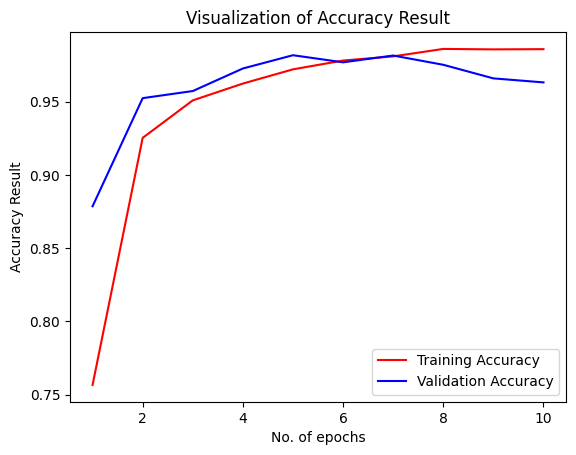

In [54]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Some Other Metrics for Model Evaluation

In [56]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Tomato___Early_blight',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___healthy']

In [60]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 4745 files belonging to 10 classes.


In [62]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

149/149 [==============================] - 113s 757ms/step


(array([[1.0000000e+00, 2.2542541e-10, 1.3893973e-09, ..., 1.5023167e-09,
         2.0271217e-12, 3.3177336e-11],
        [1.0000000e+00, 7.1726458e-10, 1.0077534e-10, ..., 6.9717940e-13,
         2.3511043e-15, 1.8879929e-13],
        [1.0000000e+00, 6.0343043e-11, 1.6458543e-13, ..., 6.2389953e-13,
         4.8899053e-16, 2.8730982e-12],
        ...,
        [2.5462869e-05, 1.0201187e-04, 4.4276218e-05, ..., 6.6598614e-06,
         9.3341851e-07, 9.9981755e-01],
        [4.0441260e-05, 8.3266816e-05, 1.2941975e-05, ..., 2.5225074e-06,
         9.0915552e-07, 9.9983382e-01],
        [4.3029218e-06, 1.2106666e-05, 8.1980634e-06, ..., 4.4622374e-04,
         4.6706054e-07, 9.9949861e-01]], dtype=float32),
 (4745, 10))

In [64]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [66]:
predicted_categories

<tf.Tensor: shape=(4745,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [68]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(4745, 10), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [70]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(4745,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [72]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                        precision    recall  f1-score   support

                    Apple___Apple_scab       0.83      0.99      0.90       499
              Apple___Cedar_apple_rust       0.97      0.99      0.98       435
                       Apple___healthy       1.00      0.81      0.89       497
           Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
                Corn_(maize)___healthy       1.00      1.00      1.00       465
                 Potato___Early_blight       0.98      0.95      0.97       480
                      Potato___healthy       0.96      0.97      0.97       451
                 Tomato___Early_blight       0.94      0.97      0.95       475
Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      1.00      1.00       490
                      Tomato___healthy       1.00      0.96      0.98       476

                              accuracy                           0.96      4745
                             macro avg

In [76]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[493,   0,   0,   1,   1,   2,   1,   1,   0,   0],
       [  4, 430,   0,   0,   0,   0,   0,   1,   0,   0],
       [ 83,   0, 402,   0,   0,   0,  10,   2,   0,   0],
       [  0,   0,   0, 477,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 465,   0,   0,   0,   0,   0],
       [  3,   0,   0,   1,   0, 457,   0,  19,   0,   0],
       [  3,  10,   0,   0,   0,   0, 438,   0,   0,   0],
       [  1,   2,   1,   0,   0,   0,   5, 462,   4,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 490,   0],
       [  4,   2,   0,   0,   0,   5,   0,   9,   0, 456]], dtype=int64)

### Confusion Matrix Visualization

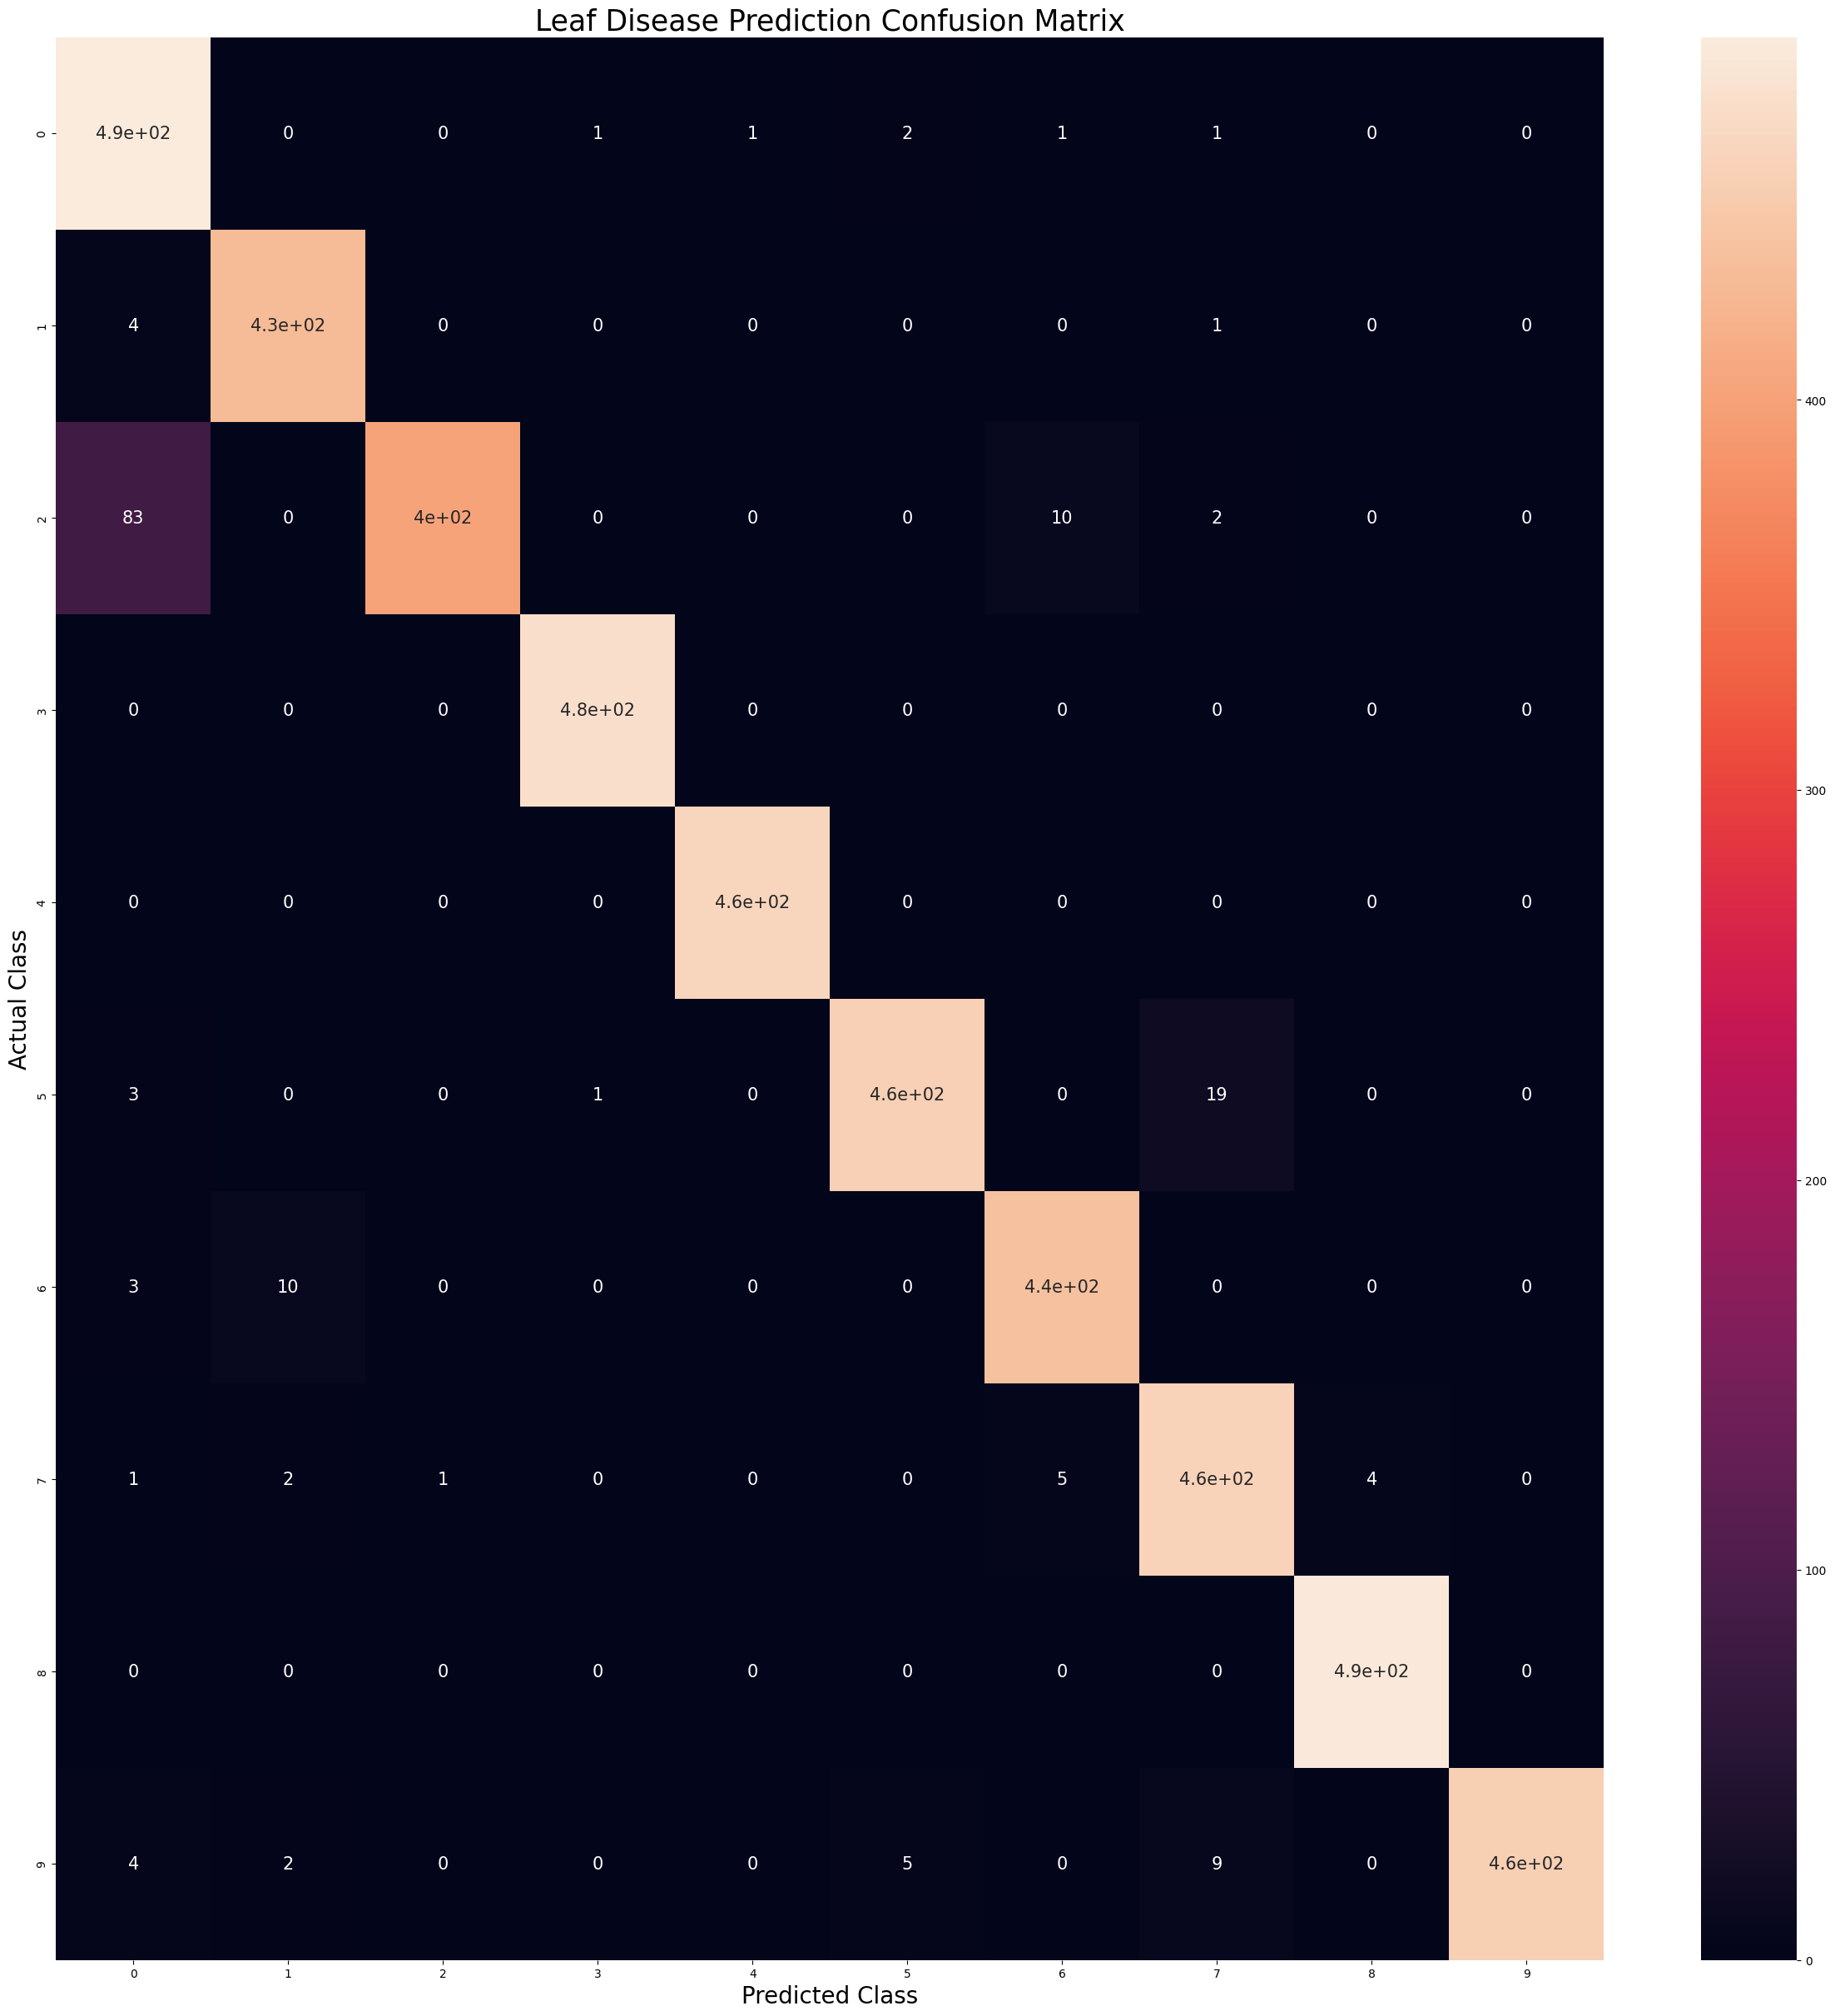

In [86]:
plt.figure(figsize=(30,30))
sns.heatmap(cm,annot=True,annot_kws={'size':15})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Leaf Disease Prediction Confusion Matrix",fontsize=25)
plt.show()